## import numpy and pandas

In [3]:
import numpy as np
import pandas as pd

## visualiztionlib and set %matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [8]:
df = pd.read_csv('911.csv')

## check the info() of the df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [10]:
pd.read_csv('911.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## to check the data

In [12]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## what are the top 5 zipcodes for 911 calls?

In [14]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

## what are the twonship(twp) for 911 calls?

In [16]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

# getting a title by spelling the string

In [17]:
df['reason']=df['title'].apply(lambda title:title.split(':')[0])

In [18]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

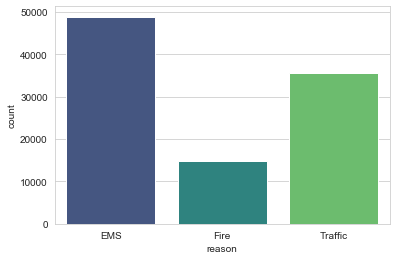

In [20]:
sns.countplot(x='reason',data=df,palette='viridis')

## converting str to datetime

In [23]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [24]:
df['hour']=df['timeStamp'].apply(lambda time: time.hour)
df['month']=df['timeStamp'].apply(lambda time: time.month)
df['day of week']=df['timeStamp'].apply(lambda time: time.dayofweek)

In [25]:
dmap ={0: 'mon',1: 'tue',2: 'wed',3: 'thu',4: 'fri',5: 'sat',6: 'sun'}

In [27]:
df['day of week']= df['day of week'].map(dmap)

## now use seaborn to create a countplot of the day of the week column with the hue b the reason coumn

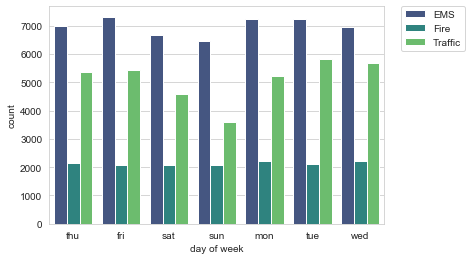

In [31]:
sns.countplot(x='day of week',data=df,hue='reason',palette='viridis')
#to realocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)